In [1]:
# Package imports

import os
import numpy as np
import json
import torch
from torchvision import datasets as tv_dataset, models
from torchvision import transforms as tv_transforms
from torchvision.utils import make_grid
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch_helper as thelper
import plt_helper
import util_helper
import warnings
warnings.filterwarnings('ignore')
colab_kernel = False

In [2]:
data_dir = "./assets/flower_data"
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')

In [3]:
if colab_kernel:    
    google_drive_mount = '/content/drive/'
    drive.mount(google_drive_mount)  # https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA
    proj_dir = google_drive_mount + 'My Drive/colab/pytorch-challenge'

In [4]:
# Creating transforms
normalize = ([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
crop = 224
resize = 256

augment = [tv_transforms.RandomRotation(30), tv_transforms.RandomHorizontalFlip(),
           tv_transforms.CenterCrop(224), tv_transforms.RandomVerticalFlip()]

transforms = {}
transforms['validation'] = thelper.Transforms.validation(resize=resize, crop=crop, normalize=normalize)
transforms['train'] = thelper.Transforms.train(augment=augment, normalize=normalize)

In [5]:
# Creating datasets
dataset = {}
dataset['train'] = thelper.Dataset.dataset(train_dir, transforms['train'])
dataset['validation'] = thelper.Dataset.dataset(valid_dir, transforms['validation'])

In [6]:
# Creating dataloaders
data_loader = {}
data_loader['train'] = thelper.Loaders.loader(dataset['train'])
data_loader['validation'] = thelper.Loaders.loader(dataset['validation'])

In [7]:
print(data_loader)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x7f2a95943fd0>, 'validation': <torch.utils.data.dataloader.DataLoader object at 0x7f2a95943dd8>}


In [8]:
# Label mapping
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
label_map=cat_to_name

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

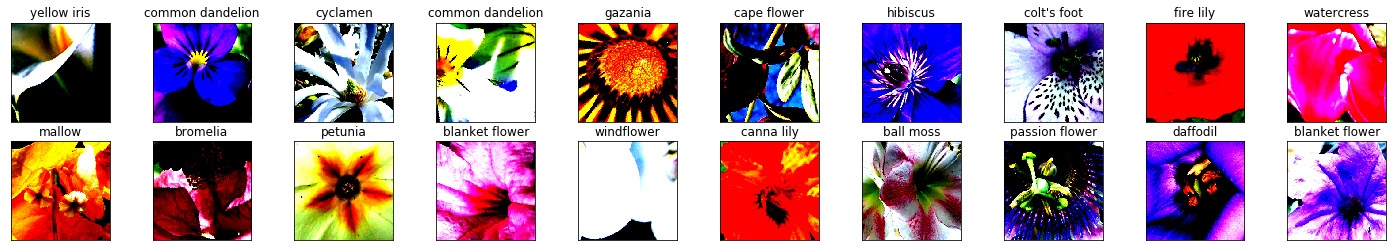

In [9]:
# Get a batch of training data
images, labels = next(iter(data_loader['train']))


# Get some images from batch
# images, labels = util_helper.rnd_classes(batch_images, classes_batch_images, label_map, k=4)

images = images.numpy() # convert images to numpy for display
labels = labels.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    # plt.imshow(np.transpose(images[idx], (1, 2, 0)).astype(np.uint8))
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(label_map[str(labels[idx])])


# # Make a grid from batch
# grid = make_grid(images)

# # Plot grid
# plt_helper.image_show(grid, title = [label[1] for label in labels])

In [12]:
# Create network

fc_layers = [512, 256] 
dropout=0.2 
out_features = 102

my_net = thelper.MyNet('resnet152', fc_layers=None, out_features=out_features)

#  Config params
for param in my_net.model.parameters():
     param.requires_grad = False

fc==> None


In [13]:
my_net.model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [ ]:
my_net.model.fc